# Introduction to Sampling and Hypothesis Testing

## Random Variables | Examples in Python

In [1]:
# Select this cell and type Ctrl-Enter to execute the code below.

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Bernoulli Distribution

The simplest discrete probability distribution is the **Bernoulli distribution**: 

$$B \sim \text{Bernoulli}(p)$$

This describes a situation where there are only two possible outcomes, labelled "success" ($B=1$) and "failure" ($B=0$).

The probability of obtaining a success is a constant, $p$.

$$
\begin{align*}
 \mathbb{P}(B = x) &= \begin{cases}
  p & \text{for $x=1$}\\
  1-p & \text{for $x=0$}
  \end{cases}
\\
\\
\mathbb{E}B &= 1 \cdot p + 0 \cdot (1-p) = p
\\
\\
\text{Var}B &= \mathbb{E}(B-p)^2 = (1-p)^2 \cdot p + (0-p)^2 \cdot (1-p) = p(1-p)
\end{align*}
$$


#### Example: rolling a six with one die


In [2]:
six = stats.bernoulli(1/6)  # a Bernoulli distribution with p=1/6

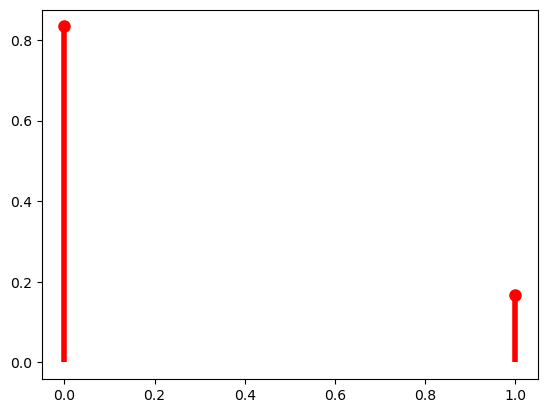

In [3]:
# plot the probability mass function
x = np.arange(2)
plt.plot(x,six.pmf(x), 'ro', ms=8)
plt.vlines(x, 0, six.pmf(x), colors='r', lw=4)

In [ ]:
# the expected value
six.mean()

In [ ]:
# the variance
six.var()

### Binomial Distribution

If $X$ is the number of successes in $n$ *independent and identically distributed* (i.i.d.) Bernoulli trials, with probability of success $p$, then $X$ is said to follow a **binomial distribution**: 

$$X = B_{1} + ... + B_{n} \sim \text{binom}(n,p)$$

The probability of obtaining $x$ successes is given by

$$
\begin{align*}
  \mathbb{P}(X = x) &= \binom{n}{x}p^{x}(1-p)^{n-x}.
\\
\\
\mathbb{E}X &= \mathbb{E}( B_{1} + \cdots + B_{n} ) = \mathbb{E}B_{1} + \cdots + \mathbb{E}B_{n} = np
\\
\\
\text{Var}X &= \text{Var}( B_{1} + \cdots + B_{n} ) = \text{Var}B_{1} + \cdots + \text{Var}B_{n} = np(1-p)
\end{align*}
$$


#### Example: number of sixes obtained when rolling ten dice


In [4]:
sixes = stats.binom(10, 1/6)  # n=10, p=1/6

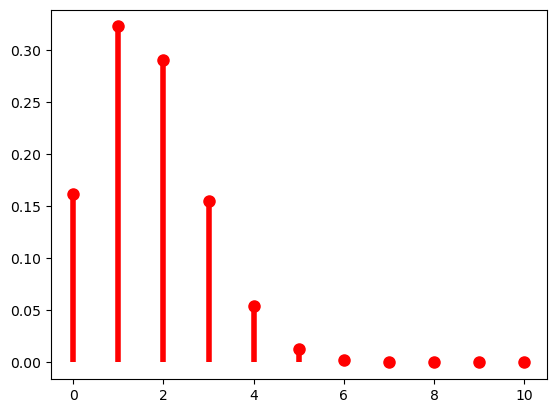

In [5]:
# plot the probability mass function
x = np.arange(11)
plt.plot(x,sixes.pmf(x), 'ro', ms=8)
plt.vlines(x, 0, sixes.pmf(x), colors='r', lw=4)

In [ ]:
# plot the cumulative distribution function
plt.step(x,sixes.cdf(x))

In [ ]:
# the expected value
sixes.mean()

In [ ]:
# the variance
sixes.var()

Calculate the probability of rolling one or more sixes.

In [ ]:
1 - sixes.pmf(0)

### Poisson Distribution

The **Poisson distribution** describes the number of observations of an event that is randomly distributed in space or time.

$$X \sim \text{Poisson}(\lambda)$$

e.g., number of radioactive decays in a second, number of accidents in a year, number of mutations on a chromosome.

The probability of observing $x$ events is given by

$$
\begin{align*}
  \mathbb{P}(X = x) &= \frac{e^{-\lambda}\lambda^{x}}{x!} \text{ for } x=0,1,2,...
\\
\\
\mathbb{E}X &= \lambda
\\
\\
\text{Var}X &= \lambda
\end{align*}
$$



In [6]:
impacts = stats.poisson(4) # e.g. an average of 4 meteorite impacts per year.

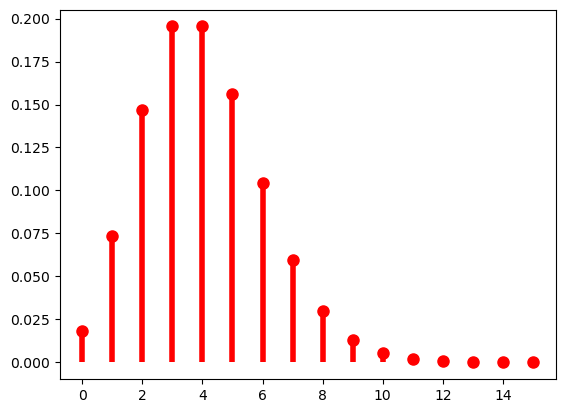

In [7]:
# plot the probability mass function
x = np.arange(16)
plt.plot(x,impacts.pmf(x), 'ro', ms=8)
plt.vlines(x, 0, impacts.pmf(x), colors='r', lw=4)

In [ ]:
# plot the cumulative distribution function
plt.step(x,impacts.cdf(x))

In [ ]:
# the expected value
impacts.mean()

In [ ]:
# the variance
impacts.var()

What is the probability of observing between 2 and 4 meteorite impacts in a given year?

In [ ]:
impacts.cdf(4) - impacts.cdf(1)

### Uniform Distribution

The **uniform distribution** describes a continuous random variable with a flat pdf over a specified interval.

$$X \sim U(a,b)$$

e.g. angle of a spinner, where $a=0$ and $b=360$.


$$
\begin{align*}
  f(x) &= \frac{1}{b-a} \text{ for } a \le x \le b
\\
\\
\mathbb{E}X &= \frac{1}{2}(a+b)
\\
\\
\text{Var}X &= \frac{1}{12}(b-a)^2
\end{align*}
$$



In [9]:
angle = stats.uniform(0,360) # e.g. angle of a spinner.

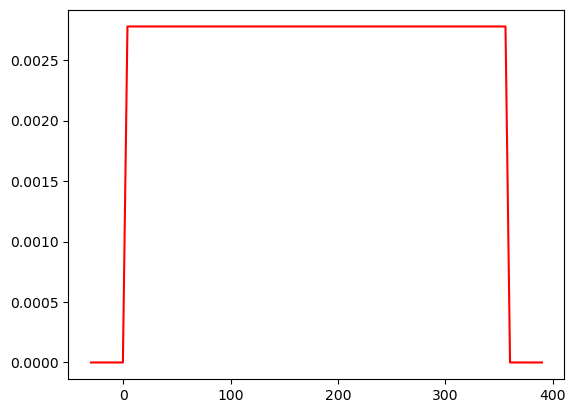

In [10]:
# plot the probability density function
x = np.linspace(-30,390,100)
plt.plot(x, angle.pdf(x), color='r')

In [ ]:
# plot the cumulative distribution function
plt.plot(x,angle.cdf(x))

In [ ]:
# the mean
angle.mean()

In [ ]:
# the variance
angle.var()

What is the probability of spinning an angle between 90 and 180 degrees?

In [ ]:
angle.cdf(180) - angle.cdf(90)

### Exponential Distribution

The **exponential distribution** describes waiting times between Poisson events.

$$X \sim \text{exp}(\lambda)$$

e.g. time until a single U-238 atom decays.


$$
\begin{align*}
  f(x) &= \lambda e^{-\lambda x}
\\
\\
\mathbb{E}X &= \frac{1}{\lambda}
\\
\\
\text{Var}X &= \frac{1}{\lambda^2}
\end{align*}
$$



In [ ]:
lam = 4  # e.g. an average of 4 meteorite impacts per year.
wait = stats.expon(0,1/lam)  # X describes the time until the first meteorite impact, in years.

In [ ]:
# plot the probability density function
x = np.linspace(0,2,100)
plt.plot(x, wait.pdf(x), color='r')

In [ ]:
# plot the cumulative distribution function
plt.plot(x,wait.cdf(x))

In [ ]:
# the mean
wait.mean()

In [ ]:
# the variance
wait.var()

Find the probability of observing a meteorite impact during the first half of the year.

In [ ]:
wait.cdf(0.5)

### Normal Distribution

The **normal distribution** (also known as the Gaussian distribution) describes many situations associated with measurement. Its parameters are the *mean*, $\mu$, and the *variance*, $\sigma^2$:

$$X \sim N(\mu,\sigma^2)$$

e.g. measured thickness of a piece of paper

$$
\begin{align*}
  f(x) &= \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{(x-\mu)^2}{2\sigma^2}}
\\
\\
\mathbb{E}X &= \mu
\\
\\
\text{Var}X &= \sigma^2
\end{align*}
$$

The normal distribution can be used as an approximation to the binomial ( for large $n$ ) and the Poisson ( for large $\lambda$ ).


In [ ]:
mu = 200
sigma = 20
thickness = stats.norm(mu,sigma)  # paper thickness in microns

In [ ]:
# plot the probability density function
x = np.linspace(100,300,100)
plt.plot(x, thickness.pdf(x), color='r')

In [ ]:
# plot the cumulative distribution function
plt.plot(x,thickness.cdf(x))

In [ ]:
# the mean
thickness.mean()

In [ ]:
# the variance
thickness.var()

What proportion of measurements are expected to be over 225 $\mu m$?

In [ ]:
1 - thickness.cdf(225)

### Log-normal distribution

Many processes in biology, chemistry and the social sciences lead to variables that have **log-normal distributions**, that is, $\log{X}$ follows a normal distribution.